In [1]:
import zipfile
import pandas as pd

In [2]:
with zipfile.ZipFile('../datasets/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../datasets')

In [81]:
df = pd.read_csv('../datasets/client_info.csv')

In [82]:
df = df.set_index('ID')

In [83]:
df.head(2)

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0


In [84]:
Y = df[['TARGET']].copy()
print('Размерность Y', Y.shape)

Размерность Y (355190, 1)


In [85]:
x_df = df.drop('TARGET',axis=1)
print('Размерность x', x_df.shape)

Размерность x (355190, 103)


In [86]:
X_num = x_df.select_dtypes(exclude='object')
print('Количественных переменных:', X_num.shape[-1])

Количественных переменных: 47


In [87]:
X_cat = x_df.select_dtypes(include='object')
print('Категориальных переменных:', X_cat.shape[-1])

Категориальных переменных: 56


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scal = scaler.fit_transform(X_num) #сделаем стандартизацию наших признаков
X_num_scal


array([[-0.24393221, -0.38023161, -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831],
       [-0.24393221,  0.01683471, -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831],
       [-0.24393221, -0.31331349, -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831],
       ...,
       [-0.24393221,  0.019401  , -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831],
       [-0.24393221, -0.38023161, -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831],
       [-0.24393221, -0.38023161, -0.04482367, ..., -0.03230285,
        -0.10961305, -0.07198831]])

In [89]:
X_num_scal = pd.DataFrame(X_num_scal, columns=X_num.columns.tolist(), index=X_num.index)

In [90]:
print('Среднее отклонение:', X_num_scal.mean(axis = 0).round(2), sep="\n")

Среднее отклонение:
CR_PROD_CNT_IL              0.0
AMOUNT_RUB_CLO_PRC          0.0
TURNOVER_DYNAMIC_IL_1M     -0.0
AMOUNT_RUB_SUP_PRC          0.0
REST_DYNAMIC_FDEP_1M        0.0
REST_DYNAMIC_SAVE_3M       -0.0
CR_PROD_CNT_VCU            -0.0
REST_AVG_CUR               -0.0
AMOUNT_RUB_NAS_PRC          0.0
TRANS_COUNT_SUP_PRC        -0.0
TRANS_COUNT_NAS_PRC         0.0
CR_PROD_CNT_TOVR           -0.0
CR_PROD_CNT_PIL            -0.0
TURNOVER_CC                 0.0
TRANS_COUNT_ATM_PRC         0.0
AMOUNT_RUB_ATM_PRC          0.0
TURNOVER_PAYM              -0.0
AGE                         0.0
CR_PROD_CNT_CC              0.0
REST_DYNAMIC_FDEP_3M       -0.0
REST_DYNAMIC_IL_1M          0.0
CR_PROD_CNT_CCFP            0.0
REST_DYNAMIC_CUR_1M        -0.0
REST_AVG_PAYM              -0.0
LDEAL_GRACE_DAYS_PCT_MED   -0.0
REST_DYNAMIC_CUR_3M         0.0
CNT_TRAN_SUP_TENDENCY3M     0.0
TURNOVER_DYNAMIC_CUR_1M    -0.0
REST_DYNAMIC_PAYM_3M        0.0
SUM_TRAN_SUP_TENDENCY3M     0.0
REST_DYNAMIC_IL_3M  

In [91]:
print('Стандартное отклонение:', X_num_scal.std(axis = 0).round(2), sep="\n")

Стандартное отклонение:
CR_PROD_CNT_IL              1.0
AMOUNT_RUB_CLO_PRC          1.0
TURNOVER_DYNAMIC_IL_1M      1.0
AMOUNT_RUB_SUP_PRC          1.0
REST_DYNAMIC_FDEP_1M        1.0
REST_DYNAMIC_SAVE_3M        1.0
CR_PROD_CNT_VCU             1.0
REST_AVG_CUR                1.0
AMOUNT_RUB_NAS_PRC          1.0
TRANS_COUNT_SUP_PRC         1.0
TRANS_COUNT_NAS_PRC         1.0
CR_PROD_CNT_TOVR            1.0
CR_PROD_CNT_PIL             1.0
TURNOVER_CC                 1.0
TRANS_COUNT_ATM_PRC         1.0
AMOUNT_RUB_ATM_PRC          1.0
TURNOVER_PAYM               1.0
AGE                         1.0
CR_PROD_CNT_CC              1.0
REST_DYNAMIC_FDEP_3M        1.0
REST_DYNAMIC_IL_1M          1.0
CR_PROD_CNT_CCFP            1.0
REST_DYNAMIC_CUR_1M         1.0
REST_AVG_PAYM               1.0
LDEAL_GRACE_DAYS_PCT_MED    1.0
REST_DYNAMIC_CUR_3M         1.0
CNT_TRAN_SUP_TENDENCY3M     1.0
TURNOVER_DYNAMIC_CUR_1M     1.0
REST_DYNAMIC_PAYM_3M        1.0
SUM_TRAN_SUP_TENDENCY3M     1.0
REST_DYNAMIC_IL_

In [92]:
#удаляю признак
cols_to_drop = ['CLNT_JOB_POSITION']
X_cat_ohe = X_cat.drop(cols_to_drop, axis=1)

In [93]:
#from sklearn.preprocessing import OneHotEncoder
#X_cat_ohe = pd.DataFrame(OneHotEncoder(sparse_output = False, handle_unknown = "ignore").fit_transform(X_cat_ohe), index=X_num.index)
#X_cat_ohe.shape

In [94]:
from sklearn. preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat_ohe = encoder.fit_transform(X_cat_ohe)
X_cat_ohe = pd.DataFrame(X_cat_ohe.toarray(), columns = encoder.get_feature_names_out(), index=X_num.index)
#X_cat_ohe.shape

In [95]:
col_count= len (X_cat_ohe. columns)
print('Количество колонок', col_count)

Количество колонок 323


In [96]:
X_num_scal.columns = X_num_scal.columns.astype(str)
X_cat_ohe.columns = X_cat_ohe.columns.astype(str)

In [97]:
#пробую join
#X_ready = X_num_scal.join(X_cat_ohe)
#X_ready.info()

In [98]:
#пробую concat
X_ready = pd.concat([X_num_scal, X_cat_ohe], axis = 1) 

In [99]:
#X_ready.to_csv('data_prepared.csv')

In [100]:
X_ready.head(2)

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,PACK_103,PACK_104,PACK_105,PACK_107,PACK_108,PACK_109,PACK_301,PACK_k01,PACK_m01,PACK_o01
ID,,,,,,,,,,,,,,,,,,,,,
146841,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,2.356500,-0.169589,0.477531,-0.248485,-1.004598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146842,-0.243932,0.016835,-0.044824,1.221828,-0.05133,-0.312371,-0.169589,-0.330458,-0.248485,1.446347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
#df = pd.read_csv('../datasets/data_prepared.csv')
#X_ready = df.iloc[:, :-1]
#y = df.iloc[:, -1]
 
X_train, X_test, y_train, y_test = train_test_split(X_ready, Y, test_size=0.2, random_state=21)

In [102]:
print('Размерность обучающей выборки', X_train.shape)

Размерность обучающей выборки (284152, 370)


In [54]:
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)
LRG = LRG.fit(X_train, y_train.values.ravel())

In [103]:
y_pred = LRG.predict(X_test)

In [104]:
accuracy = LRG.score(X_test, y_test)
print('Значение accuracy модели на тестовой выборке:', accuracy * 100)

Значение accuracy модели на тестовой выборке: 91.97612545398238


In [105]:
#import numpy
#import sklearn.metrics
#r = sklearn.metrics.confusion_matrix(y_test, y_pred)
#r = numpy.flip(r)
#acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
#print(acc)

In [106]:
#from sklearn import metrics
#print(metrics.accuracy_score(y_test, y_pred))

In [107]:
print('Процент клиентов с индикатором оттока равным 0:', y_test.value_counts()[0]/len(y_test)*100)

Процент клиентов с индикатором оттока равным 0: 91.96064078380584


In [108]:
accuracy = LRG.score(X_test, y_test)
print('Значение accuracy модели на тестовой выборке:', accuracy * 100)

Значение accuracy модели на тестовой выборке: 91.97612545398238


Text(0.5, 1.0, 'Топ-10 наиболее важных факторов')

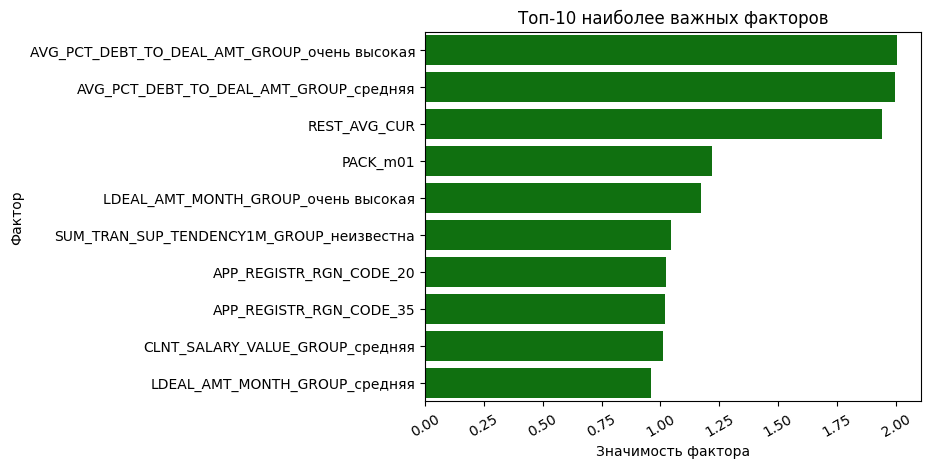

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

attribute_lst = X_ready.columns.tolist()
attribute_df = pd.DataFrame(attribute_lst, columns = ['attribute_name'])
coef_df = pd.DataFrame(np.abs(LRG.coef_).T, columns = ['attribute_meaning'])
result_df = pd.concat([attribute_df, coef_df], axis = 1)
data = result_df.sort_values('attribute_meaning', ascending = False)[:10]
sns.barplot(x = data['attribute_meaning'], y = data['attribute_name'], orient = 'h', color = "green")
plt.xlabel('Значимость фактора')
plt.xticks(rotation = 30)
plt.ylabel('Фактор')
plt.title('Топ-10 наиболее важных факторов')